**import library**

In [260]:
import pandas as pd

**read csv file**

In [261]:
df=pd.read_csv("/content/Machine Maintenance Cost Prediction for FactoWorks Ltd..csv")

In [262]:
df.sample(10)

,machine_type,machine_age_years,avg_operating_hours_per_day,daily_cycles,fault_count_last_year,previous_year_maintenance_cost,vibration_level,temperature_spike_frequency,downtime_days_last_year,predicted_maintenance_cost
38,CNC Lathe,19,7.49,56,3,20629.23,0.97,9,8,59851.66
563,Conveyor Belt,1,5.50,45,4,25048.09,0.51,6,4,28023.27
168,3D Printer,4,8.52,56,3,31812.53,0.71,5,8,36176.36
269,3D Printer,3,4.50,50,4,16030.95,0.21,5,3,28589.84
752,3D Printer,10,12.34,67,3,26020.46,1.20,7,13,61914.70
171,CNC Lathe,18,9.74,48,2,26791.00,0.49,1,9,44882.20
642,CNC Lathe,3,6.95,47,2,36420.43,0.90,9,10,45522.48
917,Hydraulic Press,13,8.23,41,2,26862.99,1.04,6,1,41229.24
590,CNC Lathe,2,11.72,48,3,30320.09,0.10,2,9,39878.24
541,3D Printer,18,8.95,57,3,20598.22,0.97,4,6,52903.74


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   machine_type                    1000 non-null   object 
 1   machine_age_years               1000 non-null   int64  
 2   avg_operating_hours_per_day     1000 non-null   float64
 3   daily_cycles                    1000 non-null   int64  
 4   fault_count_last_year           1000 non-null   int64  
 5   previous_year_maintenance_cost  1000 non-null   float64
 6   vibration_level                 1000 non-null   float64
 7   temperature_spike_frequency     1000 non-null   int64  
 8   downtime_days_last_year         1000 non-null   int64  
 9   predicted_maintenance_cost      1000 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 78.3+ KB


In [264]:
df.shape

(1000, 10)

In [265]:
df.describe()

,machine_age_years,avg_operating_hours_per_day,daily_cycles,fault_count_last_year,previous_year_maintenance_cost,vibration_level,temperature_spike_frequency,downtime_days_last_year,predicted_maintenance_cost
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,10.233000,7.935090,49.891000,2.895000,24642.449340,0.815840,5.006000,8.05400,46726.471420
std,5.449992,2.006944,7.053997,1.706718,7912.100256,0.408199,2.327527,2.77178,8550.670966
min,1.000000,1.000000,31.000000,0.000000,5000.000000,0.100000,0.000000,1.00000,22341.570000
25%,5.000000,6.587500,45.000000,2.000000,19066.367500,0.460000,3.000000,6.00000,40565.695000
50%,10.000000,7.970000,49.000000,3.000000,25114.270000,0.810000,5.000000,8.00000,46433.125000
75%,15.000000,9.300000,55.000000,4.000000,30389.125000,1.190000,6.000000,10.00000,52680.795000
max,19.000000,13.750000,76.000000,9.000000,52852.580000,1.490000,15.000000,19.00000,80270.500000


**Data Preprocessing**

In [266]:
#Checking null values
df.isnull().sum()

,0
machine_type,0
machine_age_years,0
avg_operating_hours_per_day,0
daily_cycles,0
fault_count_last_year,0
previous_year_maintenance_cost,0
vibration_level,0
temperature_spike_frequency,0
downtime_days_last_year,0
predicted_maintenance_cost,0


In [267]:
#Checking duplicate values
df.duplicated().sum()

np.int64(0)

In [268]:
df.drop(columns=['machine_type'],axis=1).corr()

,machine_age_years,avg_operating_hours_per_day,daily_cycles,fault_count_last_year,previous_year_maintenance_cost,vibration_level,temperature_spike_frequency,downtime_days_last_year,predicted_maintenance_cost
machine_age_years,1.000000,-0.060834,0.001286,0.044495,0.013294,-0.014151,0.010622,-0.030056,0.621131
avg_operating_hours_per_day,-0.060834,1.000000,-0.003181,0.010361,0.012926,0.008330,-0.044298,-0.036753,0.121228
daily_cycles,0.001286,-0.003181,1.000000,0.039457,-0.027334,0.018125,0.007905,0.003936,0.042245
fault_count_last_year,0.044495,0.010361,0.039457,1.000000,0.035321,-0.025298,-0.023276,-0.002397,0.414648
previous_year_maintenance_cost,0.013294,0.012926,-0.027334,0.035321,1.000000,-0.019124,-0.028840,-0.027299,0.008189
vibration_level,-0.014151,0.008330,0.018125,-0.025298,-0.019124,1.000000,0.041137,-0.002880,0.137112
temperature_spike_frequency,0.010622,-0.044298,0.007905,-0.023276,-0.028840,0.041137,1.000000,-0.027048,0.237677
downtime_days_last_year,-0.030056,-0.036753,0.003936,-0.002397,-0.027299,-0.002880,-0.027048,1.000000,0.456603
predicted_maintenance_cost,0.621131,0.121228,0.042245,0.414648,0.008189,0.137112,0.237677,0.456603,1.000000


**Data Visualization**

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='count'>

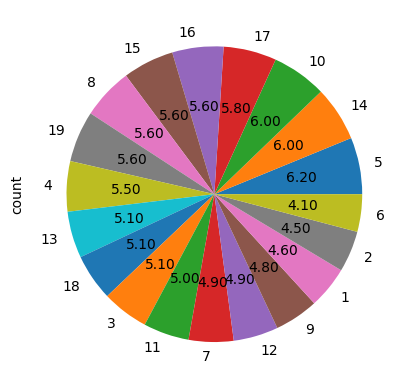

In [270]:
df['machine_age_years'].value_counts().plot(kind='pie',autopct="%.2f")

<Axes: xlabel='machine_age_years', ylabel='predicted_maintenance_cost'>

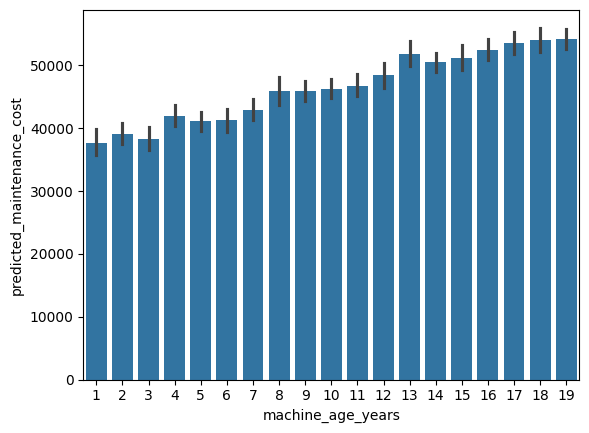

In [271]:
sns.barplot(x=df['machine_age_years'],y=df['predicted_maintenance_cost'])

<Axes: xlabel='downtime_days_last_year', ylabel='machine_age_years'>

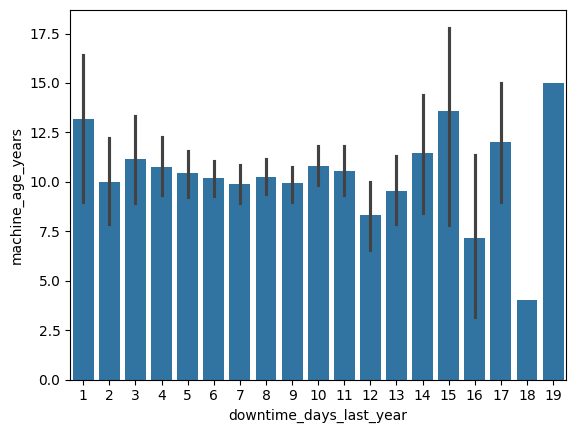

In [272]:
sns.barplot(x=df['downtime_days_last_year'],y=df['machine_age_years'])

<Axes: xlabel='fault_count_last_year', ylabel='machine_age_years'>

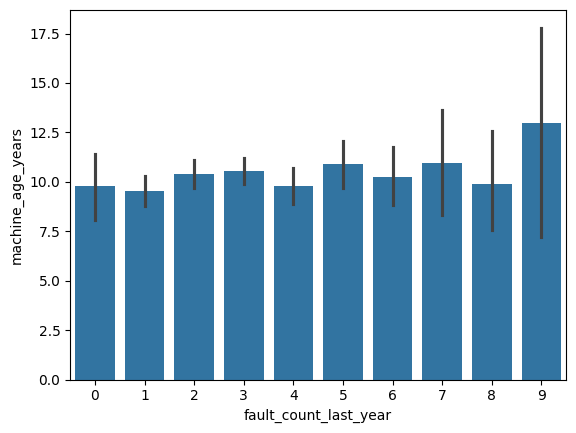

In [273]:
sns.barplot(x=df['fault_count_last_year'],y=df['machine_age_years'])

<Axes: ylabel='count'>

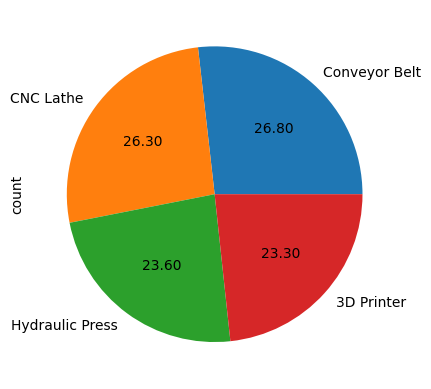

In [274]:
df['machine_type'].value_counts().plot(kind='pie',autopct="%.2f")

/tmp/ipython-input-275-1190629200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['previous_year_maintenance_cost'])


<Axes: xlabel='previous_year_maintenance_cost', ylabel='Density'>

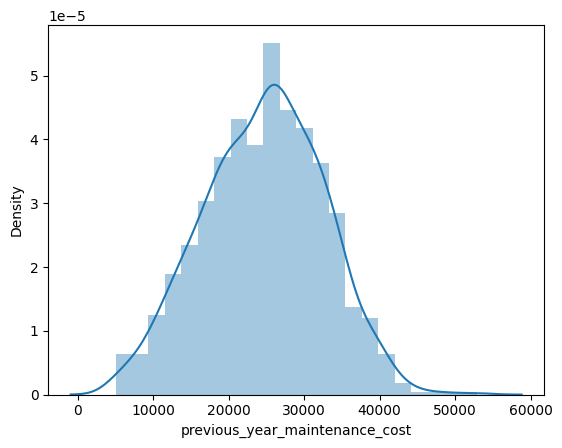

In [275]:
sns.distplot(df['previous_year_maintenance_cost'])

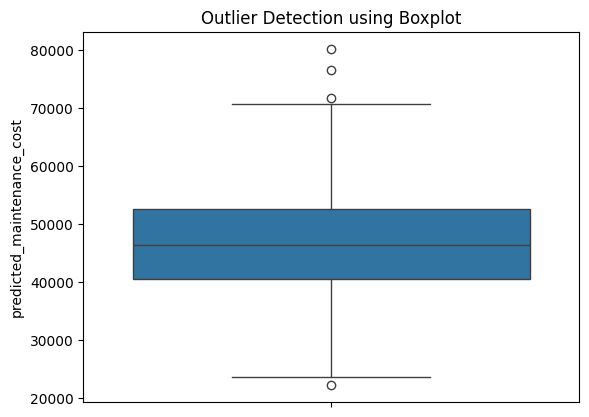

In [276]:
sns.boxplot(data=df, y="predicted_maintenance_cost")
plt.title("Outlier Detection using Boxplot")
plt.show()

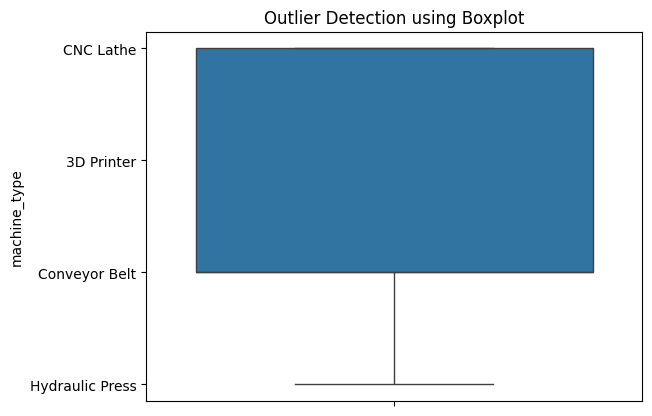

In [277]:
sns.boxplot(data=df, y="machine_type")
plt.title("Outlier Detection using Boxplot")
plt.show()

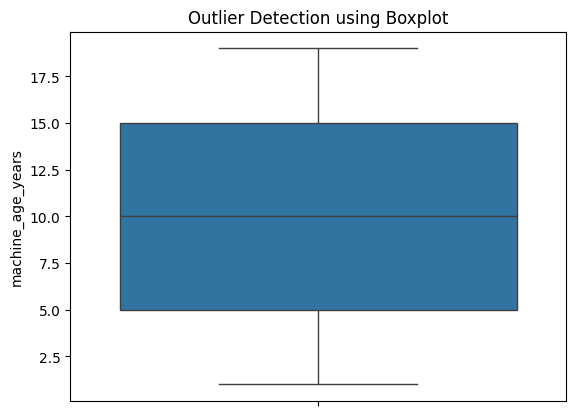

In [278]:
sns.boxplot(data=df, y="machine_age_years")
plt.title("Outlier Detection using Boxplot")
plt.show()

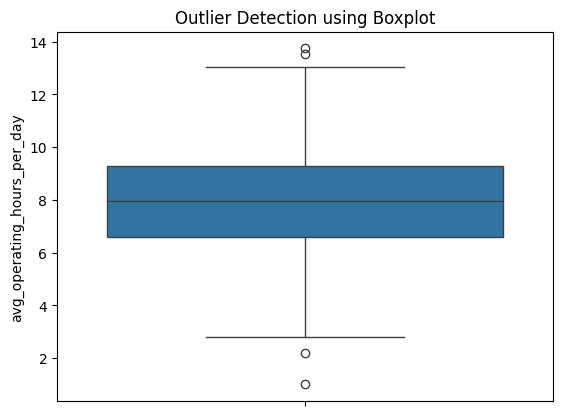

In [279]:
sns.boxplot(data=df, y="avg_operating_hours_per_day")
plt.title("Outlier Detection using Boxplot")
plt.show()

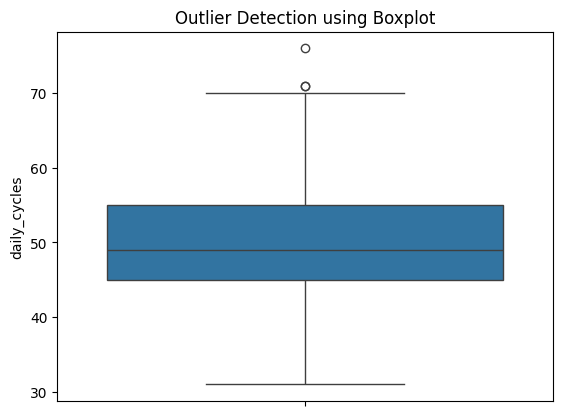

In [280]:
sns.boxplot(data=df, y="daily_cycles")
plt.title("Outlier Detection using Boxplot")
plt.show()

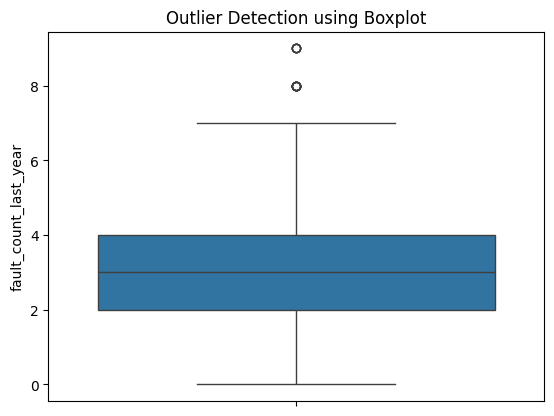

In [281]:
sns.boxplot(data=df, y="fault_count_last_year")
plt.title("Outlier Detection using Boxplot")
plt.show()

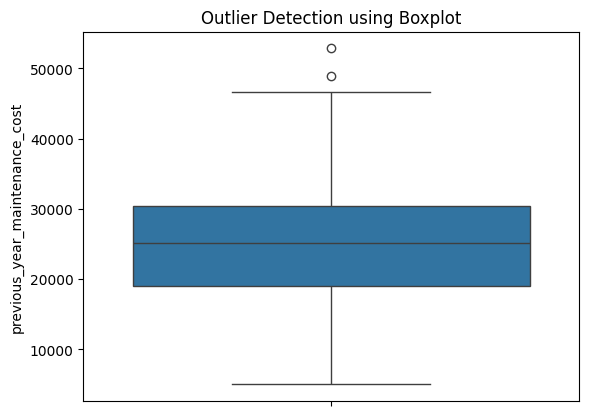

In [282]:
sns.boxplot(data=df, y="previous_year_maintenance_cost")
plt.title("Outlier Detection using Boxplot")
plt.show()

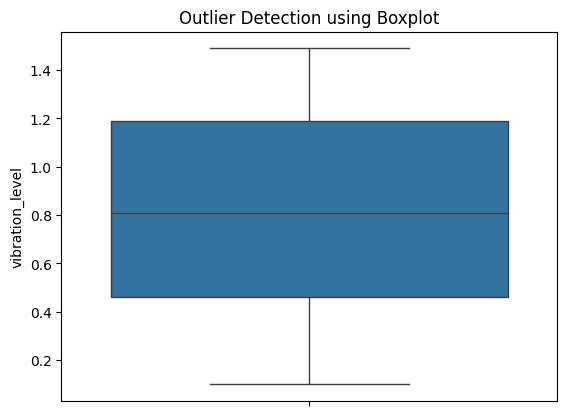

In [283]:
sns.boxplot(data=df, y="vibration_level")
plt.title("Outlier Detection using Boxplot")
plt.show()

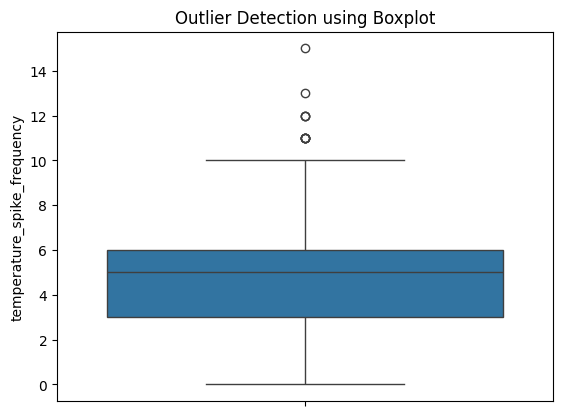

In [284]:
sns.boxplot(data=df, y="temperature_spike_frequency")
plt.title("Outlier Detection using Boxplot")
plt.show()

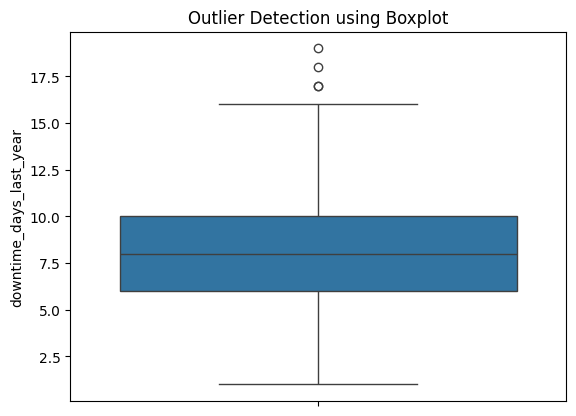

In [285]:
sns.boxplot(data=df, y="downtime_days_last_year")
plt.title("Outlier Detection using Boxplot")
plt.show()

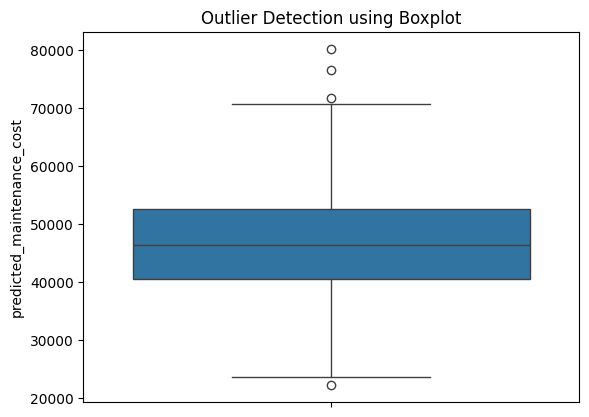

In [286]:
sns.boxplot(data=df, y="predicted_maintenance_cost")
plt.title("Outlier Detection using Boxplot")
plt.show()

**Train_test_split**

In [287]:
df_encoded=pd.get_dummies(df,columns=['machine_type'],drop_first=True) #it will convert text data into numerical and also remove drop first column

In [288]:
df_encoded

,machine_age_years,avg_operating_hours_per_day,daily_cycles,fault_count_last_year,previous_year_maintenance_cost,vibration_level,temperature_spike_frequency,downtime_days_last_year,predicted_maintenance_cost,machine_type_CNC Lathe,machine_type_Conveyor Belt,machine_type_Hydraulic Press
0,11,9.46,53,3,15485.29,0.93,4,8,45487.09,True,False,False
1,17,8.95,48,5,24203.84,1.02,7,9,64267.77,False,False,False
2,18,8.25,54,6,29981.58,0.81,1,7,51816.66,True,False,False
3,14,6.73,45,1,20674.85,1.24,8,5,47885.85,False,True,False
4,13,10.68,48,4,25106.37,0.45,4,10,56130.28,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,19,12.22,59,2,17781.14,0.70,6,5,49798.58,False,False,True
996,3,9.30,45,1,20035.71,0.45,5,7,28099.64,False,False,True
997,19,6.98,38,2,26668.50,1.38,5,8,60262.44,True,False,False
998,12,7.48,38,3,39042.31,0.32,6,9,52023.53,False,False,True


In [289]:
df.columns

Index(['machine_type', 'machine_age_years', 'avg_operating_hours_per_day',
       'daily_cycles', 'fault_count_last_year',
       'previous_year_maintenance_cost', 'vibration_level',
       'temperature_spike_frequency', 'downtime_days_last_year',
       'predicted_maintenance_cost'],
      dtype='object')

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,classification_report

In [291]:
X_train,X_test,y_train,y_test=train_test_split(df_encoded.drop(columns=['predicted_maintenance_cost']),df_encoded['predicted_maintenance_cost'],test_size=0.3,random_state=42)

In [292]:
X_train.head()

,machine_age_years,avg_operating_hours_per_day,daily_cycles,fault_count_last_year,previous_year_maintenance_cost,vibration_level,temperature_spike_frequency,downtime_days_last_year,machine_type_CNC Lathe,machine_type_Conveyor Belt,machine_type_Hydraulic Press
541,18,8.95,57,3,20598.22,0.97,4,6,False,False,False
440,7,7.26,42,2,38722.74,1.27,6,9,True,False,False
482,19,9.86,69,5,25099.92,1.41,2,7,False,False,True
422,16,6.97,62,3,28360.91,1.44,5,4,False,False,False
778,6,8.25,52,2,35457.76,0.60,6,6,True,False,False


In [293]:
X_test.head()

,machine_age_years,avg_operating_hours_per_day,daily_cycles,fault_count_last_year,previous_year_maintenance_cost,vibration_level,temperature_spike_frequency,downtime_days_last_year,machine_type_CNC Lathe,machine_type_Conveyor Belt,machine_type_Hydraulic Press
521,6,9.11,41,5,19330.65,0.46,3,2,False,True,False
737,9,7.94,48,3,18971.60,0.53,7,11,False,False,False
740,16,8.43,56,3,9613.08,1.46,5,4,True,False,False
660,14,3.89,55,3,26066.60,0.90,5,9,True,False,False
411,10,8.89,66,6,21526.23,0.20,5,7,False,False,False


In [294]:
X_train.shape , X_test.shape

((700, 11), (300, 11))

**Feature Transformation**

In [295]:
#model
trf1=LinearRegression()
# trf2=RandomForestRegressor(n_estimators=100, random_state=42)
# trf3=DecisionTreeRegressor(random_state=42)
# trf4=XGBRegressor(n_estimators=100, random_state=42)
# trf5=LGBMRegressor(n_estimators=100, random_state=42)

In [296]:
trf1.fit(X_train,y_train)
# trf2.fit(X_train,y_train)
# trf3.fit(X_train,y_train)
# trf4.fit(X_train,y_train)
# trf5.fit(X_train,y_train)

LinearRegression()

In [297]:
y_pred=trf1.predict(X_test)
# y_pred2=trf2.predict(X_test)
# y_pred3=trf3.predict(X_test)
# y_pred4=trf4.predict(X_test)
# y_pred5=trf5.predict(X_test)

In [298]:
print(f"Linear Regression")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

Linear Regression
Mean Absolute Error: 2365.681580054523
Mean Squared Error: 8353724.67445975
R-squared: 0.8785439526943651


In [299]:
# print(f"Random Forest Regressor")
# print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred2)}")
# print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred2)}")
# print(f"R-squared: {r2_score(y_test, y_pred2)}")

In [300]:
# print(f"DECISION TREE REGRESSOR ")
# print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred3)}")
# print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred3)}")
# print(f"R-squared: {r2_score(y_test, y_pred3)}")

In [301]:
# print(f"XGBRegressor")
# print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred4)}")
# print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred4)}")
# print(f"R-squared: {r2_score(y_test, y_pred4)}")

In [302]:
# print(f"LGBMRegressor")
# print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred5)}")
# print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred5)}")
# print(f"R-squared: {r2_score(y_test, y_pred5)}")

In [303]:
#By applying the multiple algorithm we come to the conclusion that we have to use LinearRegression algorithm because score of R-squared is much better than other.

**Deploy**

In [304]:
import joblib

In [305]:
joblib.dump(trf1,"model.pkl")

['model.pkl']

In [308]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [309]:
import streamlit as st

In [310]:
model=joblib.load("model.pkl")

In [312]:
#title
st.title("Machine Maintenance Cost Prediction")

2025-06-24 05:56:58.660 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 05:56:58.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 05:56:58.663 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [314]:
#input form
st.sidebar.header("Enter Machine Details")

2025-06-24 05:58:20.516 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 05:58:20.517 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 05:58:20.518 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [315]:
def user_input():
  machine_type=st.sidebar.selectbox("Machine Type",["Type A","Type B","Type C","Type D"])
  years_in_use=st.sidebar.number_input("Years the machine has been in use",min_value=0)
  operating_hours=st.sidebar.number_input("Average Operating Hours per day",min_value=0)
  daily_cycles=st.sidebar.number_input("Average Daily Cycles", min_value=0)
  fault_count = st.sidebar.number_input("Fault Count Last Year", min_value=0)
  prev_cost = st.sidebar.number_input("Previous Year Maintenance Cost", min_value=0)
  vibration = st.sidebar.slider("Vibration Level", 0.0, 10.0)
  temperature_spike = st.sidebar.slider("Temperature Spike Frequency", 0.0, 10.0)
  downtime = st.sidebar.number_input("Downtime Days Last Year", min_value=0)

#Create DataFrmae
  data={
    "machine_type":machine_type,
    "machine_age_years":years_in_use,
    "avg_operating_hours_per_day":operating_hours,
    "daily_cycles":daily_cycles,
    "fault_count_last_year":fault_count,
    "previous_year_maintenance_cost":prev_cost,
    "vibration_level":vibration,
    "temperature_spike_frequency":temperature_spike,
    "downtime_days_last_year":downtime
  }

  return pd.DataFrame([data])

input_df=user_input()

input_encoded=pd.get_dummies(input_df)

#Predict
if st.button("Predict Maintenance Cost"):
  prediction=model.predict(input_encoded)
  st.success(f"Predicted Maintenance Cost: Rs.{prediction:,.2f}")


2025-06-24 06:34:52.707 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 06:34:52.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 06:34:52.710 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 06:34:52.715 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 06:34:52.718 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 06:34:52.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 06:34:52.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 06:34:52.720 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [316]:
# Download files (Colab-specific)
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>